# ANT219 Data Visualization

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data.csv')
# Display the first few rows of the dataframe
df.head()

,Timestamp,Where are your classes? (ex. Neuroscience Building),How do you stay hydrated during the summer?,Have you ever had to go to McCosh or other medical places because of excess heat?,How well do you think Princeton is good at notifying students of heatwaves?,Does the heat distract you from your academics during classes?,SPIA,ECON,Math and Physics Buildings,Frick Chemistry Lab,McCosh Hall,East Pyne,Firestone,Frist,EQuad,Aaron Burr,What do you think Princeton can do to mitigate the effects of heatwaves?
0,11/13/2023 19:54:12,"EQuad, McCosh",I drink a lot of water.,Never,3.0,"yes, I sweat a lot",4.0,4.0,5.0,5.0,2.0,4.0,4.0,5.0,5.0,4.0,Provide more AC in academic buildings and dorms
1,11/14/2023 22:10:20,"Frist, McCosh",Try to drink water every day,Never,3.0,Yes,5.0,5.0,3.0,4.0,1.0,2.0,3.0,5.0,NaN,4.0,Provide stronger AC
2,11/16/2023 9:37:19,"McCosh, East Pyne",drinking water,Never,3.0,yes- when there is no ac,4.0,4.0,4.0,4.0,1.0,3.0,4.0,4.0,4.0,4.0,AC in all buildings and more water fountains
3,11/16/2023 9:37:26,East Pyne,Drinking lots of water,Yes - once in a year,1.0,"Yes, I am unable to focus sometimes because it...",5.0,5.0,NaN,NaN,1.0,2.0,5.0,5.0,NaN,NaN,Put AC or provide better fans in each building...
4,11/16/2023 9:47:22,"Mccosh, Econ, Spia, Green Hall",drink water constantly,Never,3.0,sometimes yes,5.0,5.0,3.0,3.0,1.0,3.0,2.0,5.0,5.0,3.0,implement more AC units in old buildings!!


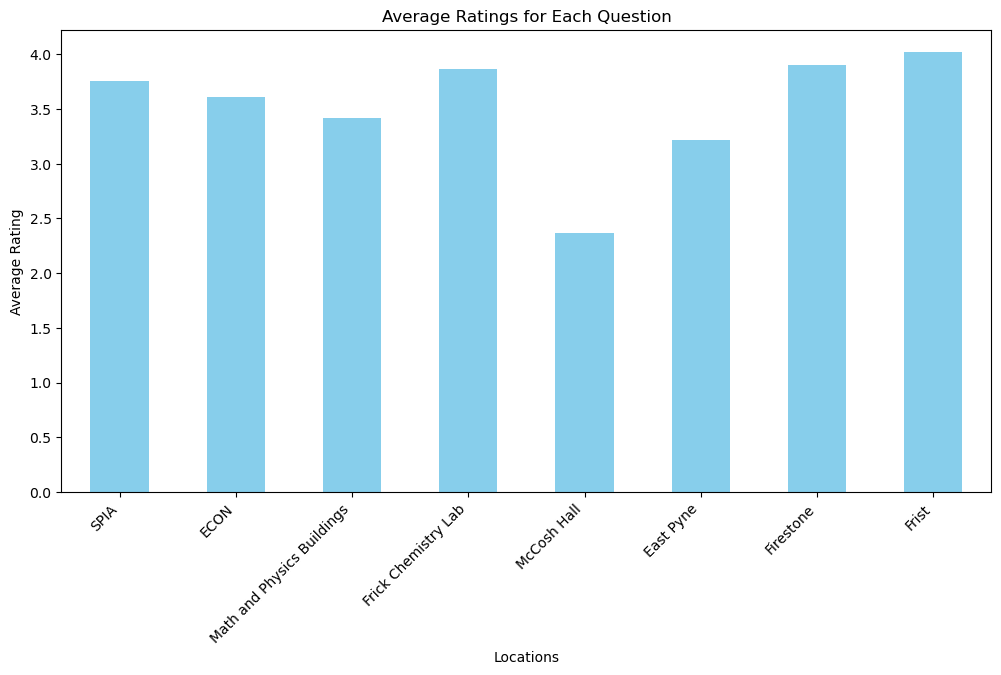

In [2]:
# Replace non-numeric values with NaN in the columns containing ratings
df.iloc[:, 6:14] = df.iloc[:, 6:14].apply(pd.to_numeric, errors="coerce")

# Calculate the average ratings for each question
average_ratings = df.iloc[:, 6:14].mean()

# Plot the average ratings using a bar chart
plt.figure(figsize=(12, 6))
average_ratings.plot(kind="bar", color="skyblue")
plt.title("Average Ratings for Each Question")
plt.xlabel("Locations")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


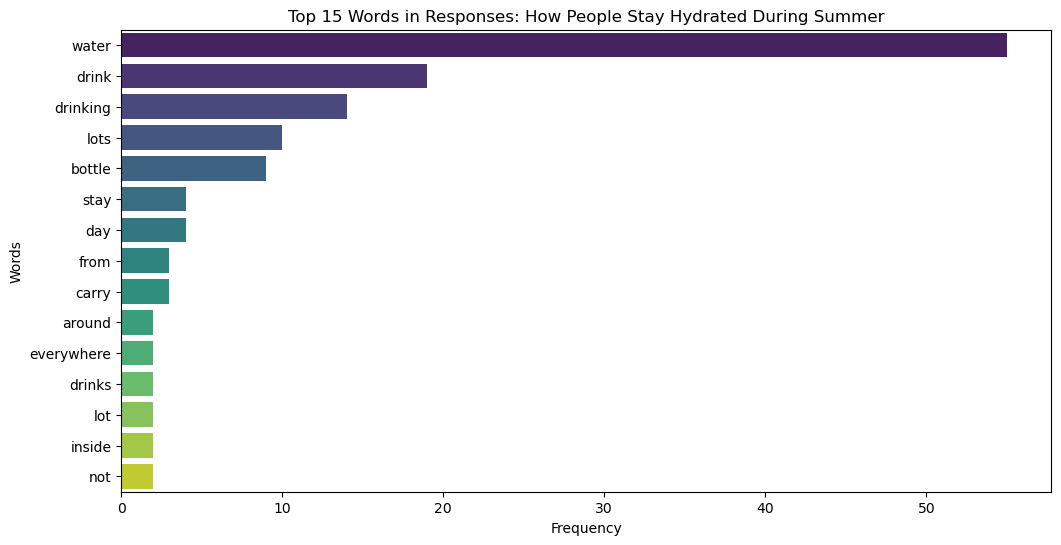

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Assuming 'df' is your DataFrame
responses = df["How do you stay hydrated during the summer?"].dropna()

# Common prepositions and single-letter words to exclude
excluded_words = set(["i", "a", "to", "and", "the", "it", "in", "on", "with", "for", "of", "at", "my", "you", "your", "me"])


# Function to preprocess words
def preprocess_word(word):
    # Remove leading and trailing punctuation
    word = word.strip(string.punctuation)

    # Exclude common prepositions and single-letter words
    if word.lower() not in excluded_words and len(word) > 1:
        return word
    else:
        return None


# Split responses into individual words, preprocess them, and remove None values
words = " ".join(responses).lower().split()
words = [preprocess_word(word) for word in words if preprocess_word(word)]

# Create a DataFrame with word frequencies
word_counts = pd.Series(words).value_counts().reset_index()
word_counts.columns = ["Word", "Frequency"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Word", data=word_counts.head(15), palette="viridis")
plt.title("Top 15 Words in Responses: How People Stay Hydrated During Summer")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

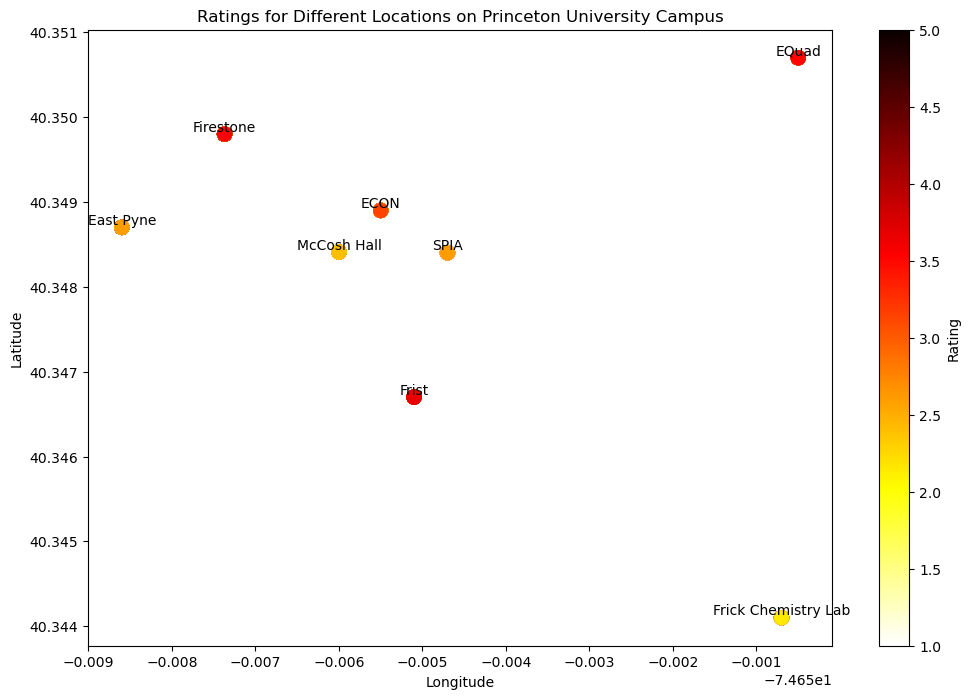

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
locations = df["Where are your classes? (ex. Neuroscience Building)"].dropna()

# Create a dictionary to map locations to coordinates on Princeton's campus
campus_coordinates = {
    "EQuad": (40.3507, -74.6505),
    "Frist": (40.3467, -74.6551),
    "SPIA": (40.3484, -74.6547),
    "Firestone": (40.3498, -74.65737),
    "East Pyne": (40.3487, -74.6586),
    "ECON": (40.3489, -74.6555),
    "Frick Chemistry Lab": (40.3441, -74.6507),
    "McCosh Hall": (40.34841, -74.656)
    # Add more locations and coordinates as needed
}

# Extract ratings for each location
location_ratings = {}

for location in campus_coordinates:
    rating_col = f"{location}"
    ratings = df[rating_col].dropna().astype(float)
    location_ratings[location] = ratings

# Plot all locations together with location label
plt.figure(figsize=(12, 8))

for location in campus_coordinates:
    ratings = location_ratings[location]

    if not ratings.empty:
        # Plot all points for the location with color corresponding to rating
        plt.scatter(
            np.repeat(campus_coordinates[location][1], len(ratings)),
            np.repeat(campus_coordinates[location][0], len(ratings)),
            c=ratings,
            cmap="hot_r",  # _r reverses the colormap
            marker="o",
            s=100,
        )

        # Annotate with location name
        plt.text(
            campus_coordinates[location][1],
            campus_coordinates[location][0],
            location,
            ha="center",
            va="bottom",
            color="black",
        )

    else:
        print(f"No ratings available for {location}.")

# Add colorbar
cbar = plt.colorbar()
cbar.set_label("Rating")

plt.title("Ratings for Different Locations on Princeton University Campus")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/william/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/8d/b6tnc2p90l548qg78nc_k0_m0000gn/T/ipykernel_28624/3716930883.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(sentiment_scores, bins=30, kde=True, palette="coolwarm")  # Use a colormap
/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


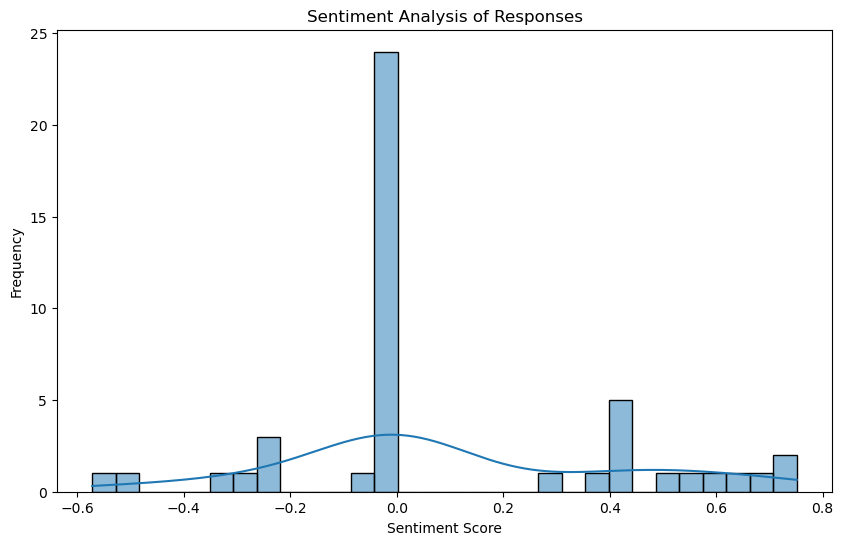

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download

# Assuming 'df' is your DataFrame
responses = df[
    "What do you think Princeton can do to mitigate the effects of heatwaves?"
].dropna()

# Download NLTK resources (if not already downloaded)
download("vader_lexicon")

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis and extract sentiment scores
sentiment_scores = responses.apply(lambda x: sia.polarity_scores(x)["compound"])

# Add sentiment scores to the DataFrame
df["Sentiment Score"] = sentiment_scores

# Visualize sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_scores, bins=30, kde=True, palette="coolwarm")  # Use a colormap
plt.title("Sentiment Analysis of Responses")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


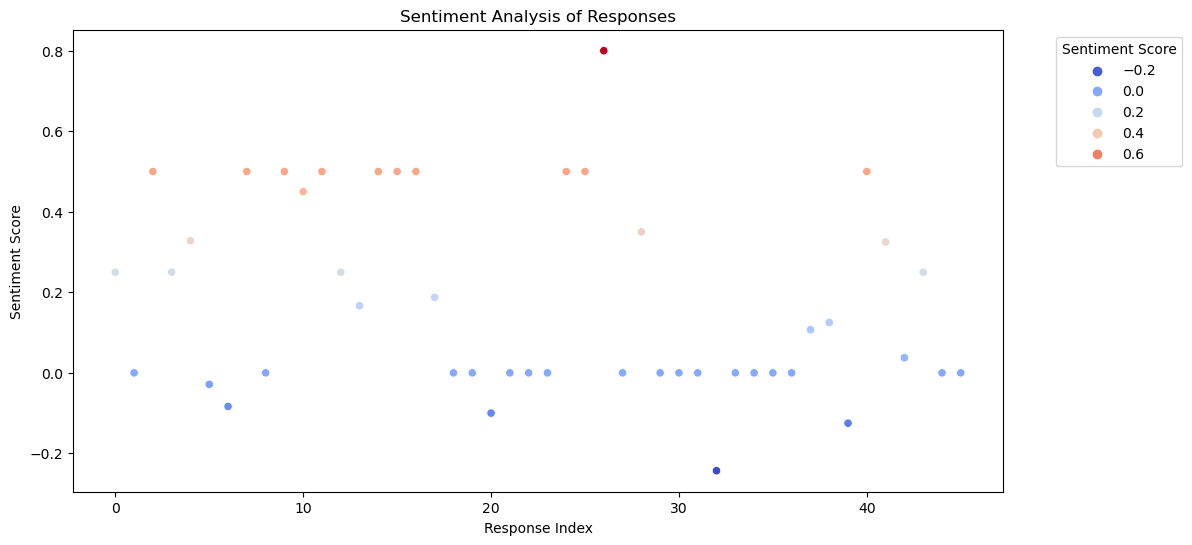

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Assuming 'df' is your DataFrame
responses = df["What do you think Princeton can do to mitigate the effects of heatwaves?"].dropna()

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each response
sentiment_scores = responses.apply(analyze_sentiment)

# Create a color map for sentiment scores
cmap = "coolwarm"

# Plot sentiment scores using a colormap
plt.figure(figsize=(12, 6))
sns.scatterplot(x=range(len(sentiment_scores)), y=sentiment_scores, hue=sentiment_scores, palette=cmap)
plt.title("Sentiment Analysis of Responses")
plt.xlabel("Response Index")
plt.ylabel("Sentiment Score")
plt.legend(title="Sentiment Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [25]:
df.describe()

,How well do you think Princeton is good at notifying students of heatwaves?,SPIA,ECON,Math and Physics Buildings,Frick Chemistry Lab,McCosh Hall,East Pyne,Firestone,Frist,EQuad,Aaron Burr,Sentiment Score
count,50.000000,38.000000,37.000000,46.000000,41.000000,47.000000,42.000000,50.000000,49.000000,37.000000,33.000000,46.000000
mean,2.480000,3.757895,3.610811,3.421739,3.865291,2.370213,3.219048,3.898000,4.020408,3.472973,3.469697,0.103717
std,0.788696,0.750002,0.858870,0.906498,0.714930,1.050034,0.924263,0.762512,0.877729,0.927556,0.660722,0.317898
min,1.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,-0.571900
25%,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,3.000000,4.000000,3.000000,3.200000,4.000000,2.000000,3.000000,4.000000,4.000000,3.000000,3.000000,0.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,4.000000,4.000000,0.411575
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.751400


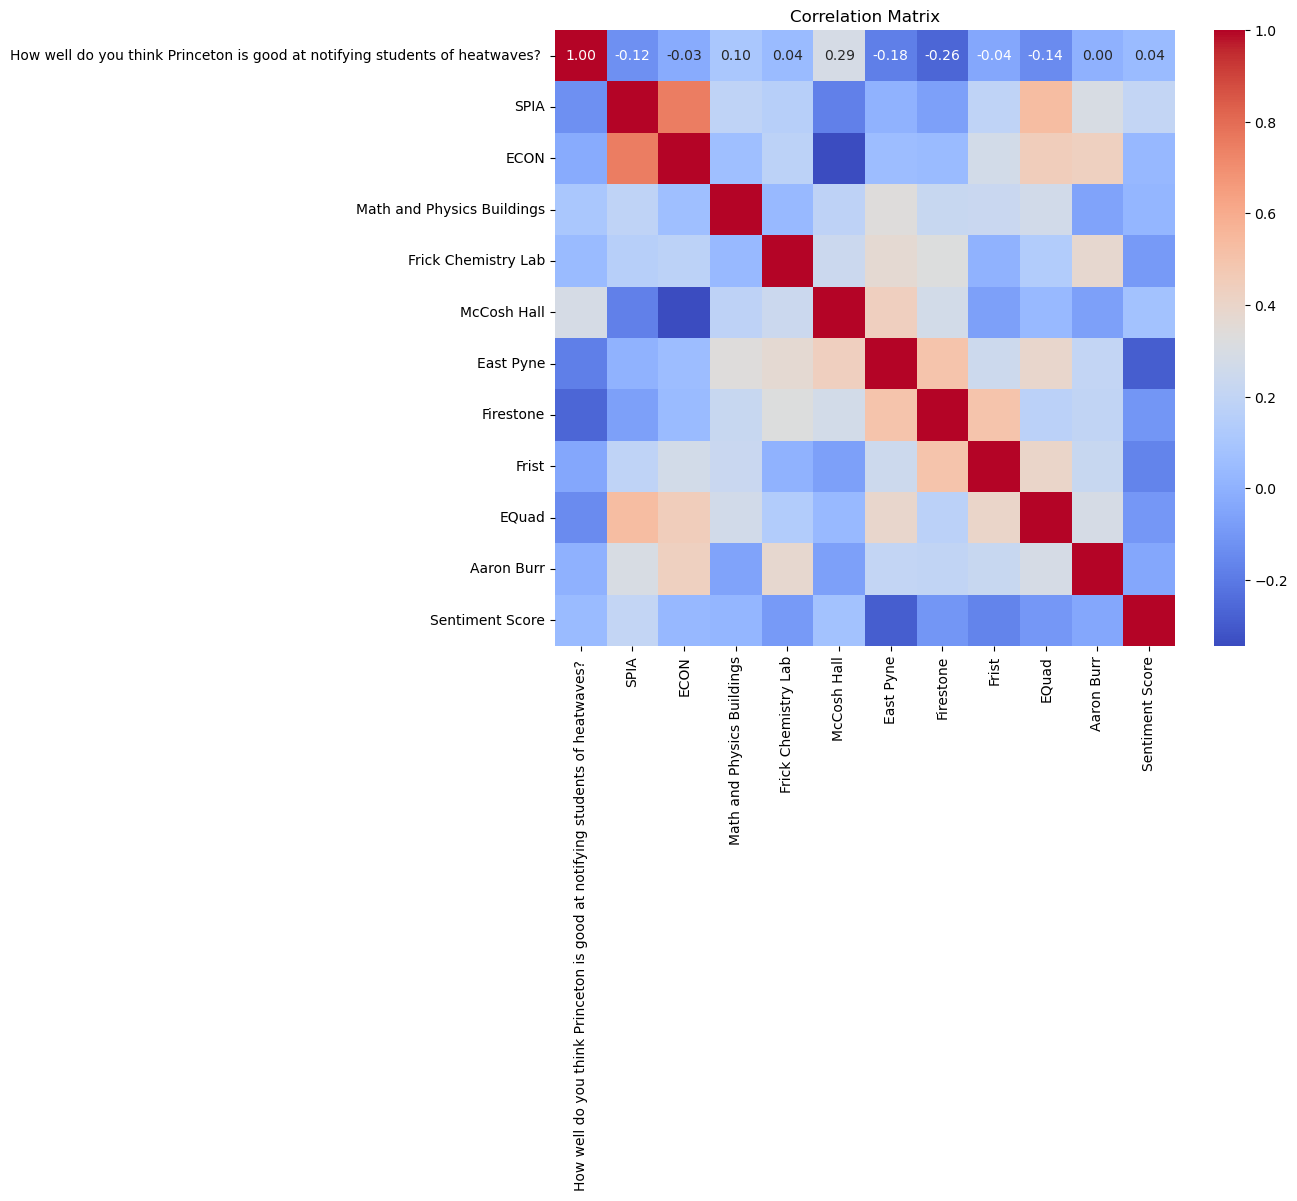

In [27]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include="number")

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<Axes: >

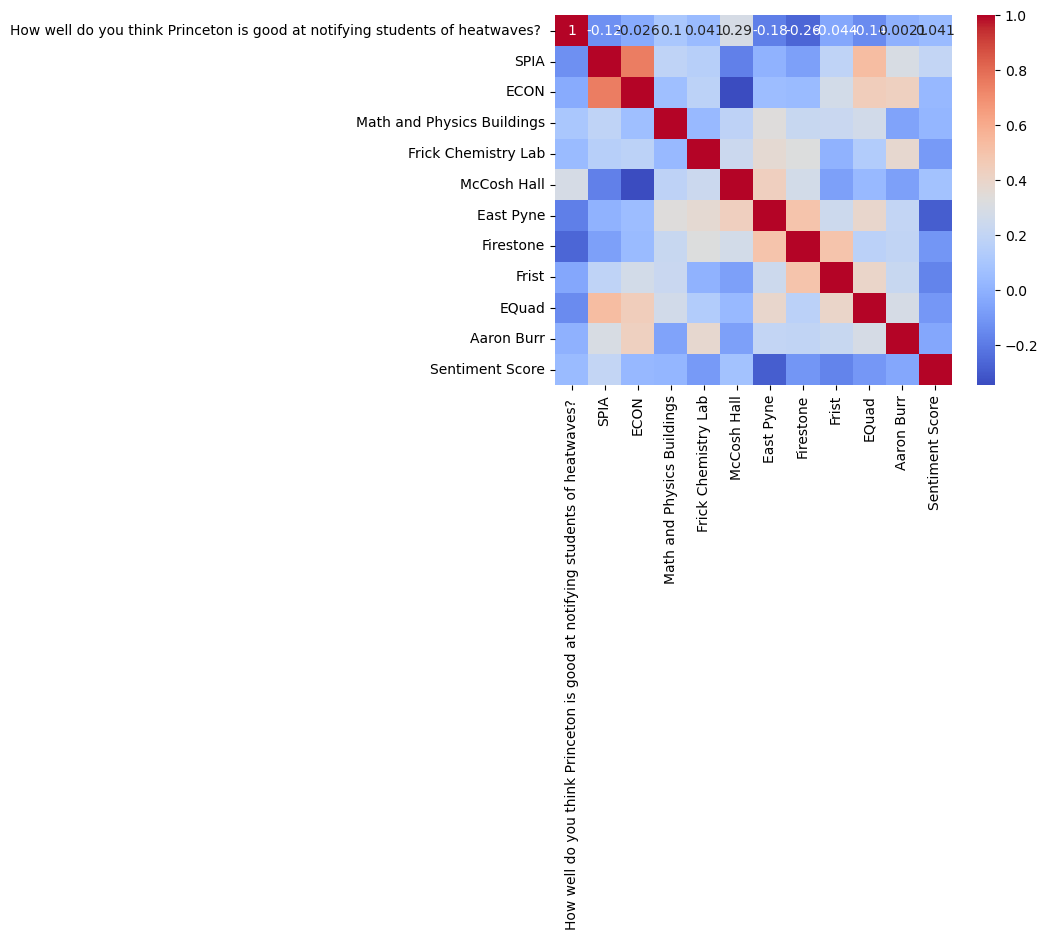

In [28]:
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


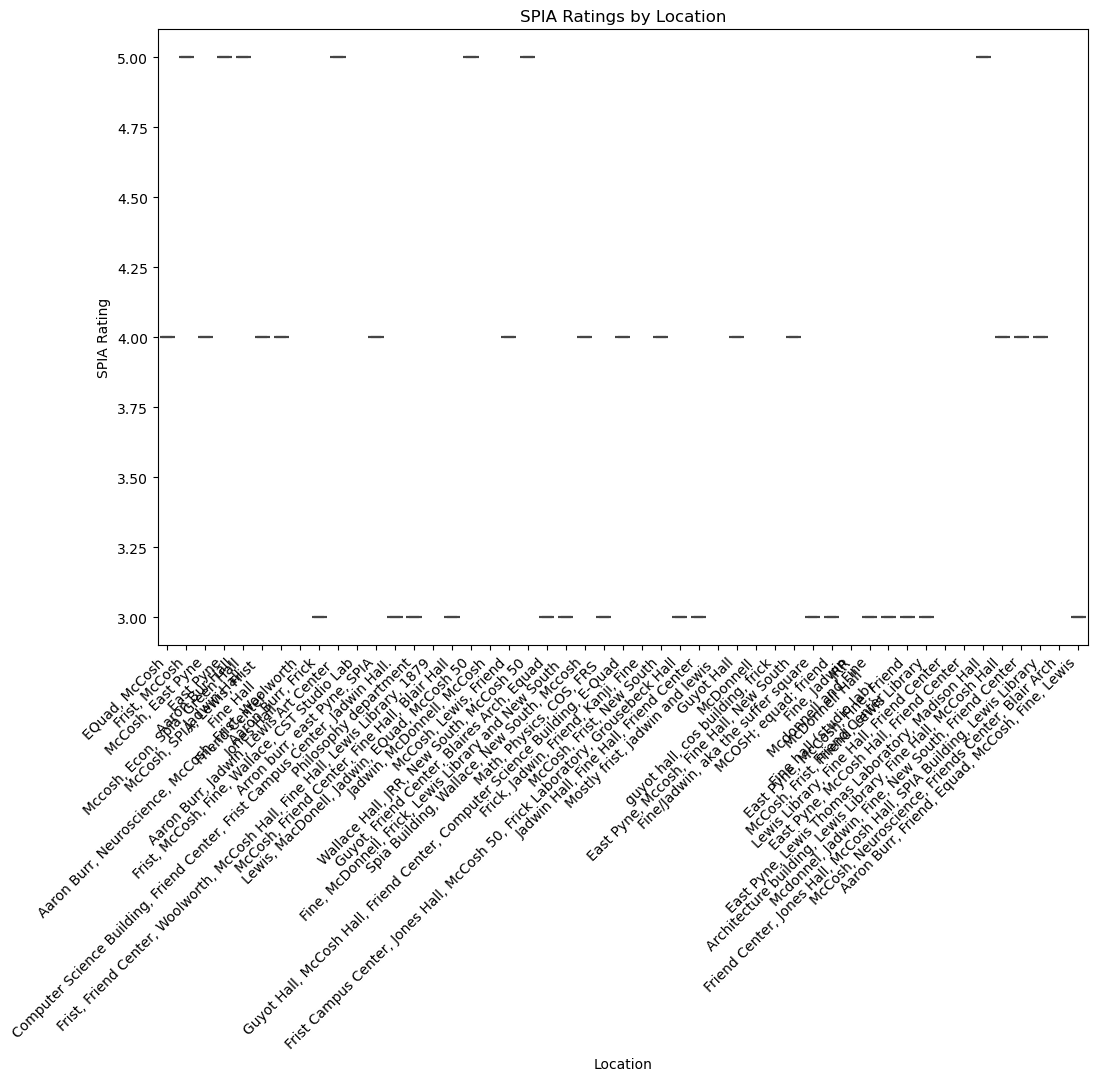

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Where are your classes? (ex. Neuroscience Building)", y="SPIA", data=df)
plt.title("SPIA Ratings by Location")
plt.xlabel("Location")
plt.ylabel("SPIA Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/william/anaconda3/envs/ant219/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


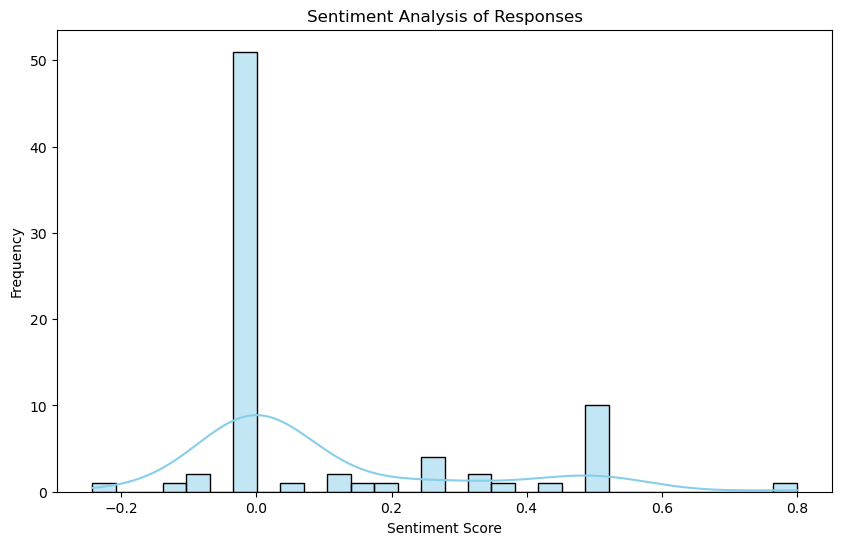

In [36]:
from textblob import TextBlob
import pandas as pd

# Assuming 'df' is your DataFrame
responses_column = (
    "What do you think Princeton can do to mitigate the effects of heatwaves?"
)


# Function to analyze sentiment
def analyze_sentiment(text):
    if pd.isna(text):  # Check if the value is NaN
        return 0  # Or any other default value you prefer for NaN
    analysis = TextBlob(str(text))  # Convert to string to handle NaN
    return analysis.sentiment.polarity


# Apply sentiment analysis to the specified column
df["Sentiment"] = df[responses_column].apply(analyze_sentiment)


# Create a bar plot for sentiment analysis
plt.figure(figsize=(10, 6))
sns.histplot(df["Sentiment"], bins=30, kde=True, color="skyblue")
plt.title("Sentiment Analysis of Responses")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

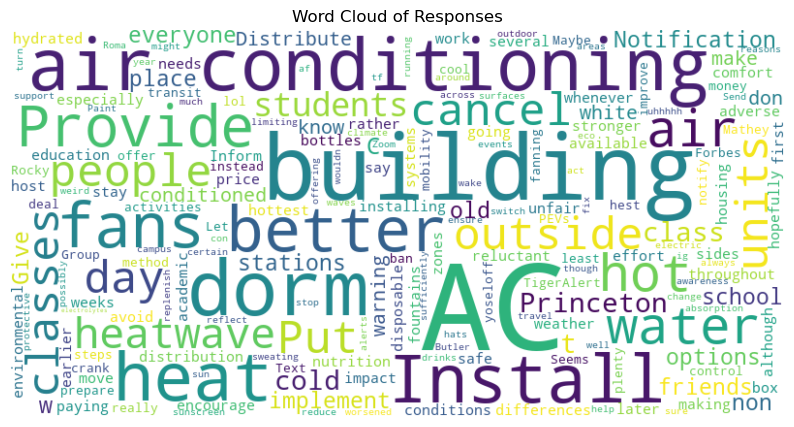

In [34]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    " ".join(
        df[
            "What do you think Princeton can do to mitigate the effects of heatwaves?"
        ].dropna()
    )
)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Responses")
plt.show()